In [36]:
from langgraph.graph import StateGraph, START, END
import random
from typing import Dict, List, TypedDict

In [37]:
class AgentState(TypedDict):
    name: str
    result: str
    number: List[int]
    counter: int

In [ ]:
def greeting_node(state: AgentState) -> AgentState:
    """ Greeting Node --> say Hi """

    state["result"] = f"Hi there, {state['name']}"
    state["counter"] = 0
    state["number"] = []

    return state

def random_node(state: AgentState) -> AgentState:
    """ Generate a random number betwewen 0 and 10 """

    state["number"].append(random.randint(0, 10))
    state["counter"] += 1

    return state

def finalization_condition(state: AgentState) -> AgentState:
    """ decide when the loop  """

    if state["counter"]<5:
        print("Loop continues", state["counter"])
        return "loop"  # loop를 계속함
    else:
        return "finalize"

def finalize_node(state: AgentState) -> AgentState:
    """ 결과 출력 """

    state["result"] += f" 현재 카운터 : {state['counter']}, 숫자 리스트 : {state['number']}, 총합 : {sum(state['number'])}"
    return state
        

In [39]:
graph = StateGraph(AgentState)

graph.add_edge(START, "greeting")

graph.add_node("greeting", greeting_node)
graph.add_node("random", random_node)
graph.add_node("finalize", finalize_node)
graph.add_edge("greeting", "random")

graph.add_conditional_edges(
    "random",
    finalization_condition,
    {
        "loop": "random",
        "finalize": "finalize"
    }
)

graph.add_edge("finalize", END)

In [40]:
app = graph.compile()

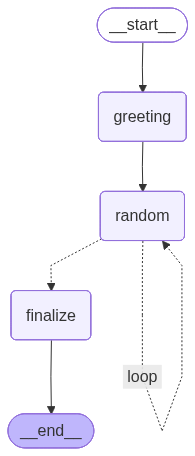

In [41]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [42]:
loopState = AgentState(name="김씨")
app.invoke(loopState)

Loop continues 1
Loop continues 2
Loop continues 3
Loop continues 4


{'name': '김씨',
 'result': 'Hi there, 김씨',
 'number': [6, 0, 5, 3, 2],
 'counter': 5}